## Project: Image Registration and Warping:

The objective of this project is to implement and demonstrate image registration using OpenCV Python.

* In many cases, image registration involves aligning a slave image, S, to a reference or master image, M, through simple coordinates transform process, according to the following steps: 


  1. Convert both S and M images to grayscale.
  2. Generate features from both images, S and M
  3. Match features between the slave (S) and master (M) images
  4. Select the best matches, and filter-out the noisy and potentially erroneous matches.
  5. Compute the homomorphy matrix between the slave (S) and the master (M) image based on the selected good matches
  6. Apply this transform to the slave image to align it with the master image.

We shall implement and illustrate each of these steps below.
    

#### Author: Mohsen Ghazel (mghazel)
* Date: April 9th, 2021

### Step 1: Imports and global variables:

In [76]:
#------------------------------------------------------
# Python imports and environment setup
#------------------------------------------------------
# opencv
import cv2
# numpy
import numpy as np
# matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# input/output OS
import os 

# date-time to show date and time
import datetime

# to display the figures in the notebook
%matplotlib inline

#------------------------------------------
# Test imports and display package versions
#------------------------------------------
# Testing the OpenCV version
print("OpenCV : ",cv2.__version__)
# Testing the numpy version
print("Numpy : ",np.__version__)

OpenCV :  4.5.1
Numpy :  1.19.2


### Step 2: Input data
* Read and visualize the master and slave images

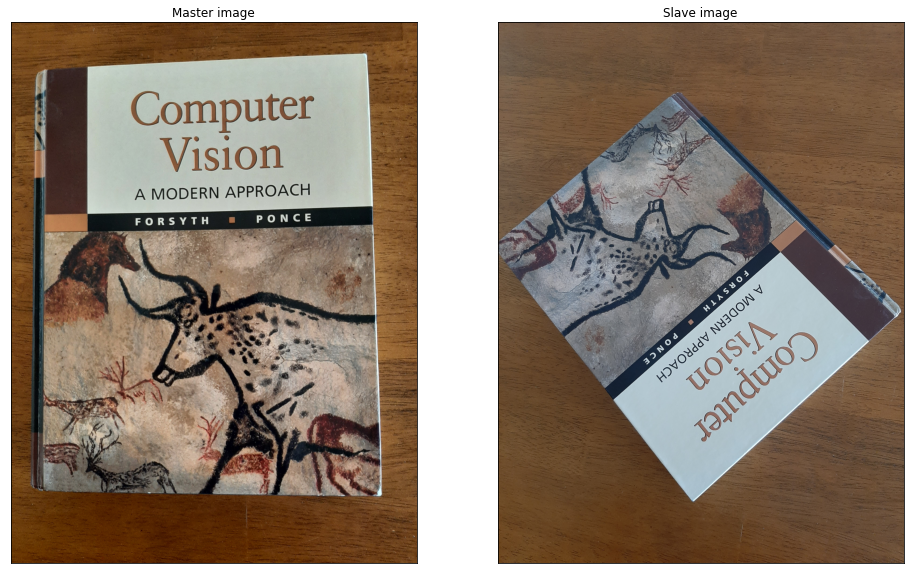

In [69]:
#----------------------------------------------------
# 2.1) Read the slave image:
#----------------------------------------------------
# the slave file name
slave_img_file_path = "../data/test-images/slave.jpg"
# check if the slave image file exists
if(os.path.exists(slave_img_file_path) == 0):
    print('Slave image file name DOES NOT EXIST! = ' + slave_img_file_path)
# Read the slave image 
slave_img = cv2.imread(slave_img_file_path, cv2.IMREAD_COLOR)

#----------------------------------------------------
# 2.2) Read the reference/master image:
#----------------------------------------------------
# the master file name
master_img_file_path = "../data/test-images/master.jpg"
# check if the master image file exists
if(os.path.exists(master_img_file_path) == 0):
    print('Master image file name DOES NOT EXIST! = ' + master_img_file_path)
# Read the master image 
master_img = cv2.imread(master_img_file_path, cv2.IMREAD_COLOR)

#------------------------------------------------------
# 2.3) Visualize the slave and master images
#------------------------------------------------------
# create a figure
plt.figure(figsize=(16, 12))
# visualize the master image
plt.subplot(121)
plt.title("Master image", fontsize=12)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(master_img, cv2.COLOR_BGR2RGB))
# visualize the slave image
plt.subplot(122)
plt.title("Slave image", fontsize=12)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(slave_img, cv2.COLOR_BGR2RGB));
     

### Step 3: Detect ORB features from the master and slave images

* We need to generate features from each image so we can match them and estimate the Homography matrix

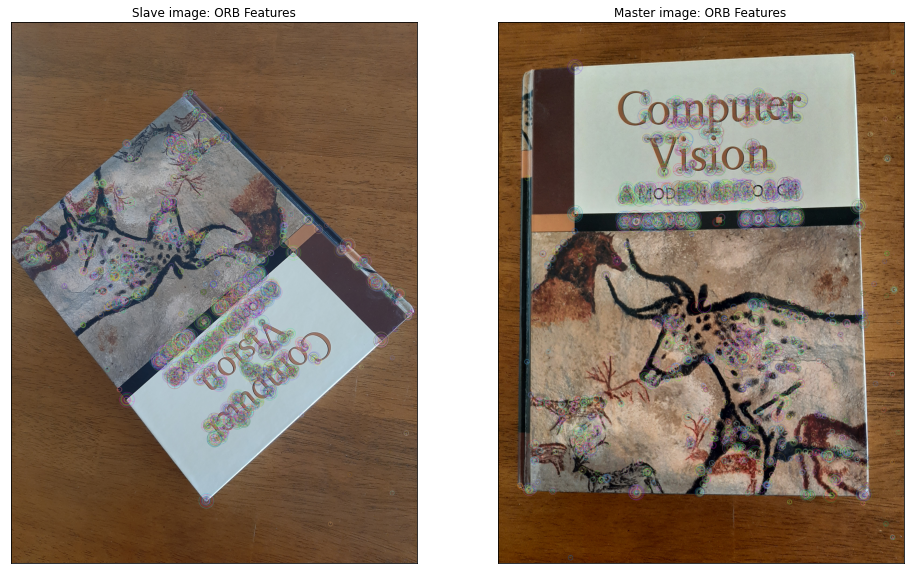

In [74]:
#------------------------------------------------------
# 3.1) Convert each image to grayscale if needed
#------------------------------------------------------
# Convert slave image to grayscale, if needed:
if ( len(slave_img.shape) > 2 ):
    img1_gray = cv2.cvtColor(slave_img, cv2.COLOR_BGR2GRAY)
else: 
    img1_gray = slave_img.copy()
# Convert master image to grayscale, if needed
if ( len(master_img.shape) > 2 ):
    img2_gray = cv2.cvtColor(master_img, cv2.COLOR_BGR2GRAY)
else: 
    img2_gray = master_img.copy()

#------------------------------------------------------
# 3.2) Get the dimensions of the master/reference 
#------------------------------------------------------
height_master, width_master = img2_gray.shape

#------------------------------------------------------
# 3.3) Make a copy of each image
#------------------------------------------------------
# slave image
img1 = slave_img.copy()

# master image
img2 = master_img.copy()
    
#------------------------------------------------------
# 3.4) Generate ORB features from the 2 images
#------------------------------------------------------
# Create ORB detector with 5000 features.
orb_detector = cv2.ORB_create(5000)
  
# Find keypoints and descriptors.
# slave image
kp1, d1 = orb_detector.detectAndCompute(img1_gray, None)
# master image
kp2, d2 = orb_detector.detectAndCompute(img2_gray, None)

#------------------------------------------------------
# 3.5) Draw the detected ORB features on the images
#------------------------------------------------------
# create a figure
plt.figure(figsize=(16, 10))
#------------------------------------------------------
# 3.5.1) Slave image:
#------------------------------------------------------
# draw only keypoints location, not size and orientation on master image
cv2.drawKeypoints(img1, kp1, img1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# visualize the detected features for the slave image
plt.subplot(121)
plt.title("Slave image: ORB Features", fontsize = 12)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
#------------------------------------------------------
# 3.5.2) Master image:
#------------------------------------------------------
# draw only keypoints location, not size and orientation on slave image
cv2.drawKeypoints(img2, kp2, img2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# visualize the detected features for the master image
plt.subplot(122)
plt.title("Master image: ORB Features", fontsize = 12)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB));

### Step 4: Match the features between the 2 images using Brute-Force Feature Matching
* Brute-Force matcher is simple:
  * It takes the descriptor of each query-image feature in first and matches it with all other features in scene-image using some distance calculation. 
    * The closest one is returned.
  * This process is repeated for all the features
  * In the end we pick the K features, based on the distances separating the query feature and its matched reference-image feature.

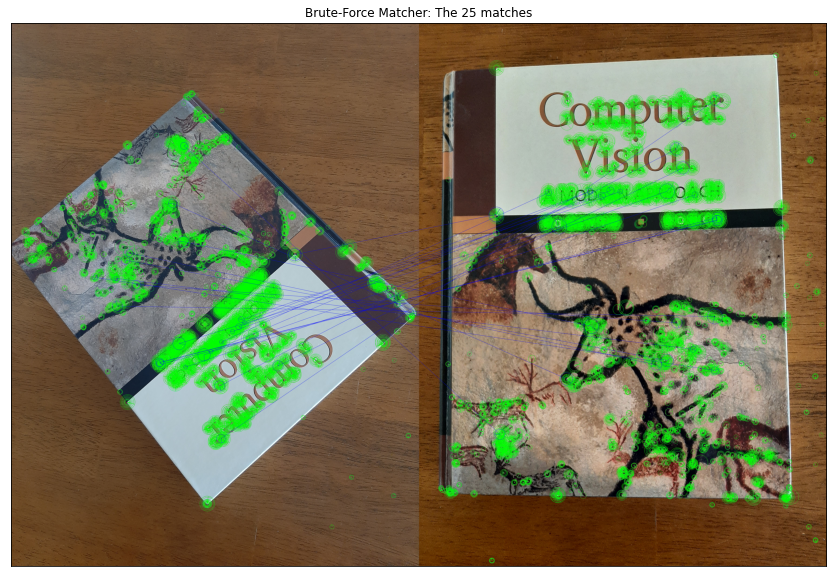

In [73]:
#----------------------------------------------------------------
# 4.1) Match the scene and query images features using the 
#      Brute-Force Matcher.
#-----------------------------------------------------------------
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors:
# d1: master image
# d2: slave image
matches = bf.match(d1,d2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

#-----------------------------------------------------------------
# 4.2) Visualize the matches
#-----------------------------------------------------------------
# visualization preferences parameters
draw_params = dict(matchColor = (255,0,0),  # matching-lines color
                   singlePointColor = (0,255,0), #  keypoints color
                   flags = 4 ) # show kepoints and matching lines
# Draw first 15 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:25],None,**draw_params)
# create the figure
plt.figure("BFMatcher - Best Match",figsize=(16,10))
plt.subplot(111)
plt.title("Brute-Force Matcher: The 25 matches", fontsize = 12)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB));

### Step 5: Use the good matches to compute the Homography Matrix:

The good ORB matches are used to compute the Homography matrix between the 2 images

In [64]:
#------------------------------------------------------
# 5.1) Sort matches on the basis of their Hamming 
#      distance.
#------------------------------------------------------
matches.sort(key = lambda x: x.distance)
 
#------------------------------------------------------
# 5.2) Good matches: Take the top 90 % matches forward.
#------------------------------------------------------
# Take the top 90 % matches forward
matches = matches[:int(len(matches)*90)]
# the number of good matches
no_of_matches = len(matches)
  
#------------------------------------------------------
# 5.3) Compute the Homography Matrix:
#------------------------------------------------------
# Define empty matrices of shape no_of_matches * 2.
p1 = np.zeros((no_of_matches, 2))
p2 = np.zeros((no_of_matches, 2))
  
# populate the good matches 
for i in range(len(matches)):
  p1[i, :] = kp1[matches[i].queryIdx].pt
  p2[i, :] = kp2[matches[i].trainIdx].pt
  
# compute the homography matrix
homography, mask = cv2.findHomography(p1, p2, cv2.RANSAC)
# print out the estimated Homography matrix
print('------------------------------------------')
print('The estimated Homography Matrix = ')
print('------------------------------------------')
print(homography)
print('------------------------------------------')

------------------------------------------
The estimated Homography Matrix = 
------------------------------------------
[[-1.12107014e+00  1.18535677e+00  1.06303284e+03]
 [-9.49907409e-01 -1.17521447e+00  5.88590119e+03]
 [ 8.24894021e-05  7.28293036e-05  1.00000000e+00]]
------------------------------------------


### Step 6: Use Homography matrix to transform the slave image wrt the master image:

* Transform the slave image using the computer Homography matrix

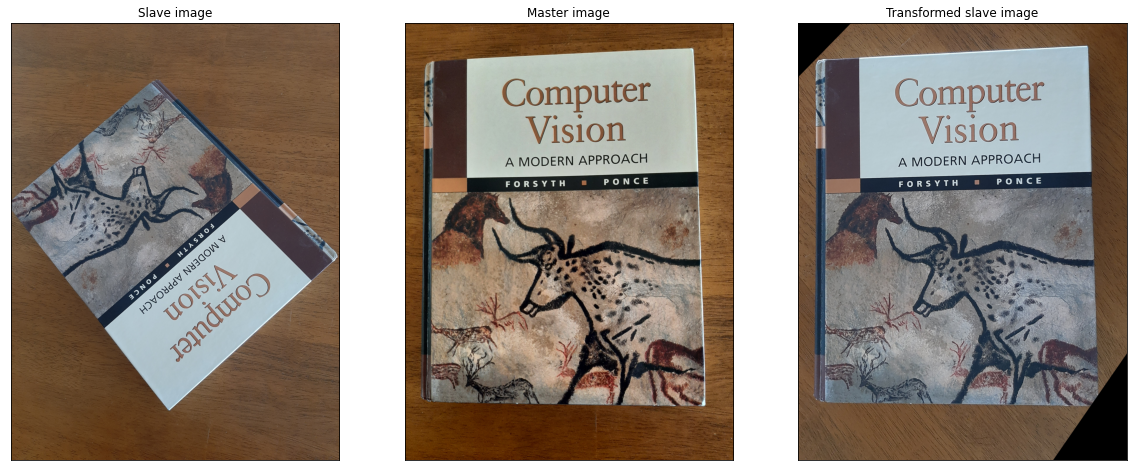

In [75]:
#------------------------------------------------------
# 6.1) Use this matrix to transform the
#      colored image wrt the reference image:
#------------------------------------------------------
transformed_img = cv2.warpPerspective(slave_img,
                    homography, (width_master, height_master))
  
#------------------------------------------------------
# 6.2) Display the final results
#------------------------------------------------------
# create a figure
plt.figure(figsize=(20, 10))
#------------------------------------------------------
# 3.3.1) Master image:
#------------------------------------------------------
# visualize the slave image
plt.subplot(131)
plt.title("Slave image", fontsize = 12)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(slave_img, cv2.COLOR_BGR2RGB))
#------------------------------------------------------
# 3.3.2) master image:
#------------------------------------------------------
# visualize the master image
plt.subplot(132)
plt.title("Master image", fontsize = 12)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(master_img, cv2.COLOR_BGR2RGB));
#------------------------------------------------------
# 3.3.2) The transformed slave image:
#------------------------------------------------------
# visualize the transformed slave image
plt.subplot(133)
plt.title("Transformed slave image", fontsize = 12)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(transformed_img, cv2.COLOR_BGR2RGB));

### Step 7: Display a successful execution message

In [32]:
# display a final message
# current time
now = datetime.datetime.now()
# display a message
print('Program executed successfully on: '+ str(now.strftime("%Y-%m-%d %H:%M:%S") + "...Goodbye!\n"))

Program executed successfully on: 2021-04-14 10:32:54...Goodbye!

